In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'NEAR-USD', start = '2023-12-12',end = '2024-05-25', interval="1h")
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-12 00:00:00+00:00,2.242747,2.258263,2.236779,2.236779,2.236779,0
2023-12-12 01:00:00+00:00,2.245341,2.266459,2.239479,2.262596,2.262596,0
2023-12-12 02:00:00+00:00,2.269637,2.312994,2.268242,2.312994,2.312994,0
2023-12-12 03:00:00+00:00,2.322607,2.356030,2.304522,2.304522,2.304522,0
2023-12-12 04:00:00+00:00,2.299252,2.306674,2.266532,2.266532,2.266532,0
2023-12-12 05:00:00+00:00,2.264416,2.303221,2.264416,2.292463,2.292463,289312
2023-12-12 06:00:00+00:00,2.291929,2.291929,2.264764,2.287678,2.287678,0
2023-12-12 07:00:00+00:00,2.291510,2.332531,2.291510,2.332531,2.332531,0
2023-12-12 08:00:00+00:00,2.338853,2.340841,2.320432,2.340841,2.340841,3857072


In [112]:
# Adding indicators
# data['RSI']=ta.rsi(data.Close, length=15)
# data['EMAF']=ta.ema(data.Close, length=20)
# data['EMAM']=ta.ema(data.Close, length=100)
# data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close'] - data['Open']
data['Target'] = data['Target'].shift(-1)

# Use .iloc to access elements by position
data['TargetClass'] = [1 if data['Target'].iloc[i] > 0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)
print(data.info())
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume', 'Close', 'Datetime'], axis=1, inplace=True)
# data['Datetime'] = data['Datetime'].apply(lambda x: x.timestamp())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3960 entries, 2023-12-12 00:00:00+00:00 to 2024-05-24 23:00:00+00:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             3960 non-null   float64
 1   High             3960 non-null   float64
 2   Low              3960 non-null   float64
 3   Close            3960 non-null   float64
 4   Adj Close        3960 non-null   float64
 5   Volume           3960 non-null   int64  
 6   Target           3959 non-null   float64
 7   TargetClass      3960 non-null   int64  
 8   TargetNextClose  3959 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 309.4 KB
None


In [113]:
data_set = data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

# # Определение критерия удаления аномальных значений (например, если значение находится за пределами IQR)
# Q1 = data_set.quantile(0.15)
# Q3 = data_set.quantile(0.85)
# IQR = Q3 - Q1
# 
# # Фильтрация данных на основе критерия IQR
# data_set = data_set[~((data_set < (Q1 - 1.5 * IQR)) | (data_set > (Q3 + 1.5 * IQR))).any(axis=1)]

#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Datetime,Open,High,Low,Adj Close,Target,TargetClass
0,2023-12-12 00:00:00+00:00,2.242747,2.258263,2.236779,2.236779,0.017255,1
1,2023-12-12 01:00:00+00:00,2.245341,2.266459,2.239479,2.262596,0.043357,1
2,2023-12-12 02:00:00+00:00,2.269637,2.312994,2.268242,2.312994,-0.018085,0
3,2023-12-12 03:00:00+00:00,2.322607,2.356030,2.304522,2.304522,-0.032720,0
4,2023-12-12 04:00:00+00:00,2.299252,2.306674,2.266532,2.266532,0.028047,1
5,2023-12-12 05:00:00+00:00,2.264416,2.303221,2.264416,2.292463,-0.004251,0
6,2023-12-12 06:00:00+00:00,2.291929,2.291929,2.264764,2.287678,0.041021,1
7,2023-12-12 07:00:00+00:00,2.291510,2.332531,2.291510,2.332531,0.001988,1
8,2023-12-12 08:00:00+00:00,2.338853,2.340841,2.320432,2.340841,-0.016449,0
9,2023-12-12 09:00:00+00:00,2.323367,2.323367,2.304739,2.306918,0.045956,1


In [114]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [115]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
# multiple feature from data provided to the model
X = []
print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
# del(yi[0:backcandles])
# X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
# y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [116]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

3143
(3143, 30, 7)
(786, 30, 7)
(3143, 1)
(786, 1)
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [117]:

from keras.src.layers import LSTM, Dense, Activation
import tensorflow as tf
import keras
from keras import optimizers, Input, Model
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=15, shuffle=False, validation_split = 0.1)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2640 - val_loss: 0.2522
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2520 - val_loss: 0.2561
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2521 - val_loss: 0.2524
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2518 - val_loss: 0.2499
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2519 - val_loss: 0.2494
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2519 - val_loss: 0.2494
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2516 - val_loss: 0.2495
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2513 - val_loss: 0.2496
Epoch 9/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2511 - val_loss: 0.2497
Epoch 10/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2509 - val_loss: 0.2498
Epoch 11/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2508 - val_loss: 0.2499
Epoch 12/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 

In [118]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[0.44040924] [1.]
[0.46862638] [0.]
[0.5309292] [0.]
[0.5441959] [1.]
[0.46632802] [1.]
[0.42689598] [0.]
[0.4930904] [1.]
[0.46708745] [1.]
[0.44073027] [0.]
[0.5052411] [1.]


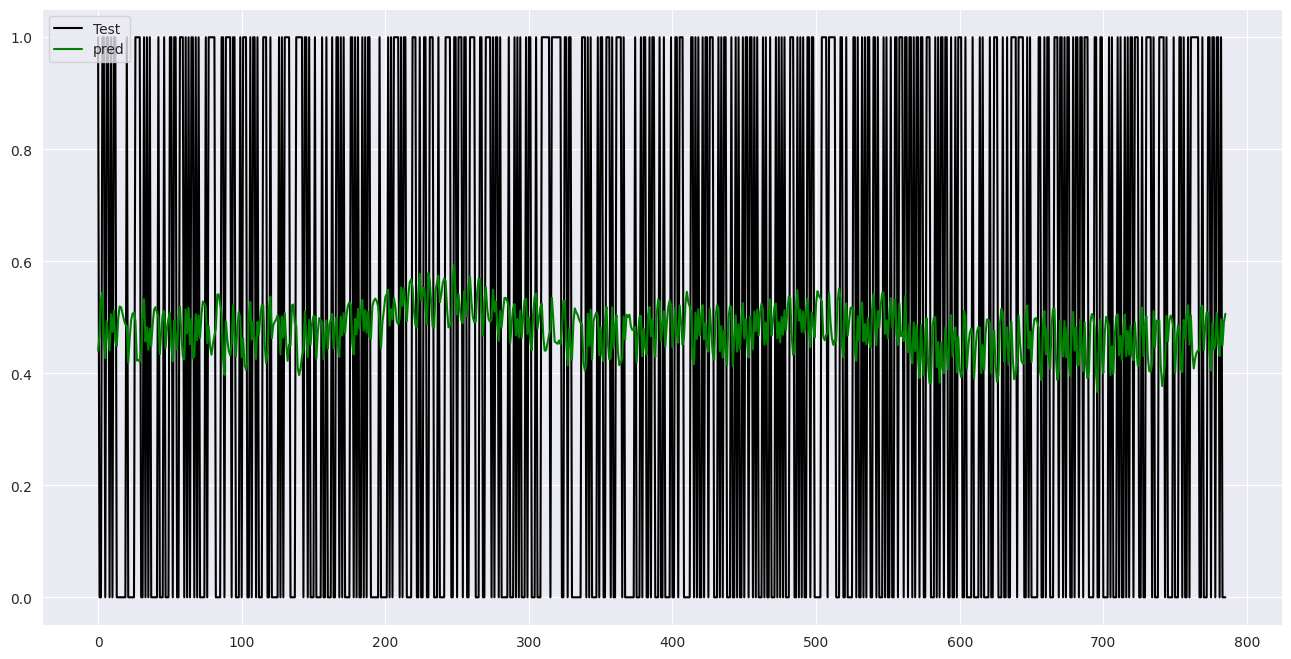

In [119]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [120]:
model.save("lstm_code_trading_model.keras")

In [121]:
import numpy as np
from keras.src.saving import load_model

# Загрузка модели из файла
model = load_model("lstm_NEAR-USD_1h_2024-05-26.keras")

# Прогноз на следующий день
def predict_next_day(model, last_sequence):
    prediction = model.predict(last_sequence)
    return prediction



# Пример использования
# Предположим, что `last_sequence` - это последний набор данных, который использовался для прогнозирования
last_sequence = np.array([X_test[-1]])  # Пример: последний набор данных тестовой выборки
print(last_sequence)
# Прогноз на следующий день
next_day_prediction = predict_next_day(model, last_sequence)[0][0]
print("Прогноз на следующий день:", next_day_prediction)

max_close_target = data_set['Open'].max() + data_set['Target'].max()
print(max_close_target)
print(next_day_prediction * max_close_target)
# Пример обратного преобразования
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_set_scaled)
# Пример обратного преобразования для одного значения из первой колонки
column_index = 1  # Номер колонки, для которой нужно выполнить обратное преобразование
normalized_value = 0.5  # Пример нормализованного значения
# Создаем массив размерности (1, n_features), где n_features = 11 в вашем случае
normalized_value_reshaped = np.array([[normalized_value] * data_set_scaled.shape[1]])
# Обратное преобразование нормализованного значения в исходный масштаб
original_value = scaler.inverse_transform(normalized_value_reshaped)[0, column_index]
print("Исходное значение из колонки {}: {}".format(column_index, original_value))
data_set.max()
# column_index = 1
# max_value = np.max(data_set[:, column_index])
# print("Максимальное значение для колонки {}: {}".format(column_index, max_value))

[[[0.99242041 0.80688243 0.81815998 0.84371251 0.82184139 0.53884052
   0.        ]
  [0.99267307 0.81712246 0.82359856 0.8512123  0.81932957 0.56904841
   1.        ]
  [0.99292572 0.81332925 0.81478988 0.83937693 0.81992625 0.54918698
   0.        ]
  [0.99317837 0.8152012  0.8290983  0.85052807 0.81890843 0.54646569
   0.        ]
  [0.99343103 0.80420204 0.80906693 0.82012665 0.80745073 0.71183467
   1.        ]
  [0.99368368 0.80242046 0.83242245 0.83919828 0.82980656 0.4372715
   0.        ]
  [0.99393633 0.82543471 0.82503107 0.84302033 0.81285687 0.58557485
   1.        ]
  [0.99418898 0.80909115 0.82198274 0.84615236 0.81807778 0.67594253
   1.        ]
  [0.99444164 0.81221241 0.82875623 0.84760939 0.83441197 0.59628762
   1.        ]
  [0.99469429 0.82921454 0.83806255 0.86393151 0.83987738 0.57025145
   1.        ]
  [0.99494694 0.83200741 0.83321378 0.86340222 0.83888397 0.57988248
   1.        ]
  [0.9951996  0.8342436  0.83999145 0.87237335 0.84253893 0.601969
   1.     

Datetime       2024-05-24 22:00:00+00:00
Open                            8.972938
High                            8.972938
Low                             8.675013
Adj Close                        8.93047
Target                          0.440013
TargetClass                            1
dtype: object

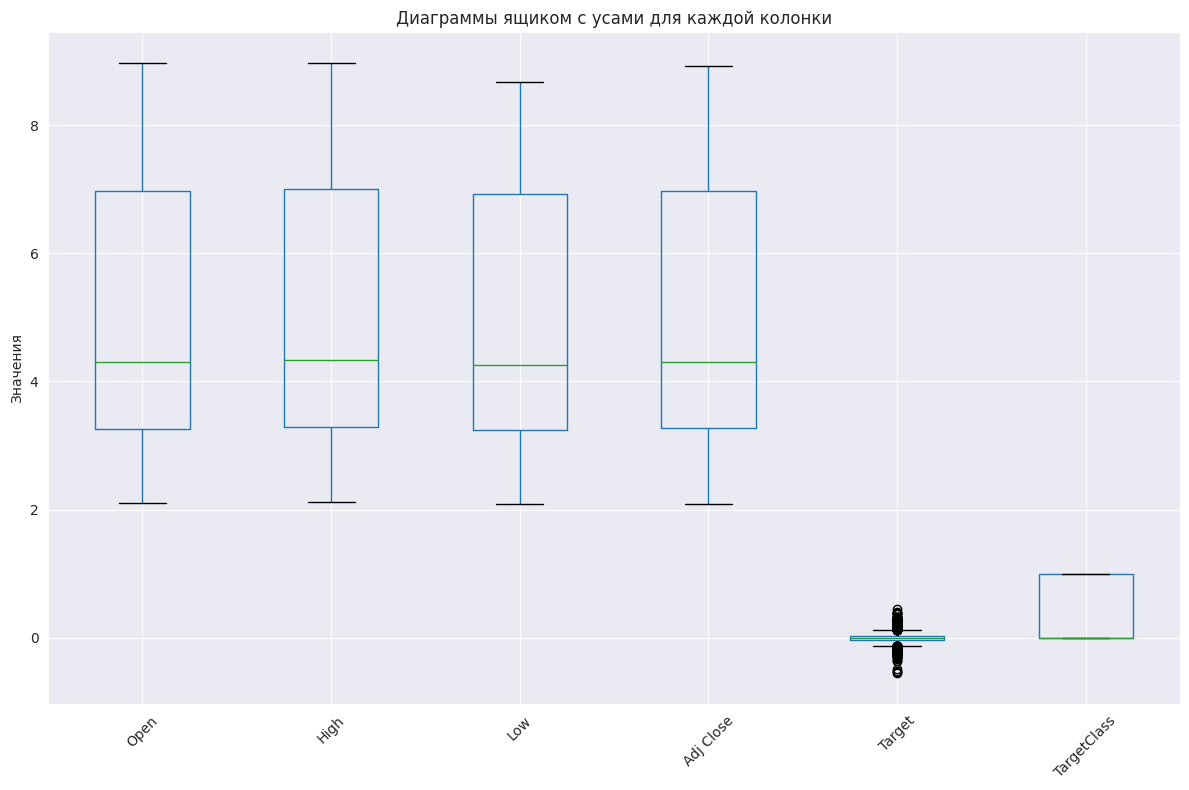

In [122]:
plt.figure(figsize=(12, 8))
data_set.boxplot(rot=45)  # rot=45 для поворота подписей по оси x на 45 градусов
plt.title('Диаграммы ящиком с усами для каждой колонки')
plt.ylabel('Значения')
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
# Загрузка модели LSTM
model = load_model("lstm_NEAR-USD_1h_2024-05-26.keras")

# Функция для получения предсказания на определенную дату из прошлого
def predict_for_past_date(model, sequence):
    prediction = model.predict(sequence)
    return prediction

# Пример использования
# Предположим, что `sequence_for_past_date` - это последовательность данных непосредственно перед интересующей нас датой
sequence_for_past_date = np.array([X_test[-10]])  # Пример: последний набор данных перед датой из прошлого
print(sequence_for_past_date)

# Получение предсказания на интересующую дату из прошлого
past_date_prediction = predict_for_past_date(model, sequence_for_past_date)[0][0]
print("Предсказание на выбранную прошлую дату:", past_date_prediction)

[[[0.99014654 0.87638131 0.87623755 0.90789377 0.87495073 0.4987246
   0.        ]
  [0.99039919 0.87053688 0.87038962 0.90034568 0.86718334 0.48853766
   0.        ]
  [0.99065184 0.86151238 0.86119216 0.89008931 0.85662114 0.53216815
   0.        ]
  [0.9909045  0.85046357 0.85468316 0.88517599 0.85188183 0.61435141
   1.        ]
  [0.99115715 0.84605459 0.85371214 0.8846861  0.8594488  0.43985191
   0.        ]
  [0.9914098  0.85210069 0.85432754 0.87290763 0.84004796 0.3399449
   0.        ]
  [0.99166246 0.83481845 0.84957998 0.8323922  0.80808108 0.47924858
   0.        ]
  [0.99191511 0.80244466 0.80879249 0.82710604 0.79586847 0.66138327
   1.        ]
  [0.99216776 0.78868717 0.80570065 0.82428648 0.80862992 0.6265595
   1.        ]
  [0.99242041 0.80688243 0.81815998 0.84371251 0.82184139 0.53884052
   0.        ]
  [0.99267307 0.81712246 0.82359856 0.8512123  0.81932957 0.56904841
   1.        ]
  [0.99292572 0.81332925 0.81478988 0.83937693 0.81992625 0.54918698
   0.     